# FairPredictor Autogluon Examples
This file contains demo code for an extended version of the example in Readme.md (additionally handling more fairness over multiple groups),  and enforcing a range of fairness definition on COMPAS.

FairPredictor is a postprocessing approach for enforcing fairness, with support for a wide range of performance metrics and fairness criteria, and support for inferred attributes, i.e. it does not require access to protected attributes at test time. 
Under the hood, FairPredictor works by adjusting the decision boundary for each group individually. Where groups are not available, it makes use of inferred group membership to adjust decision boundaries.

The key idea underlying this toolkit is that for a wide range of use cases, the most suitable classifier should do more than maximize some form of accuracy.
We offer a general toolkit that allows different measures to be optimized and additional constraints to be imposed by tuning the behavior of a binary predictor on validation data.

For example, classifiers can be tuned to maximize performance for a wide range of metrics such as:

* Accuracy
* Balanced Accuracy
* F1 score
* MCC
* Custom utility functions

While also approximately satisfying a wide range of group constraints such as:

* Demographic Parity (The idea that positive decisions should occur at the same rates for all protected groups, for example for men at the same rate as for women)
* Equal Opportunity (The recall should be the same for all protected groups)
* Minimum recall constraints (The recall should be above a particular level for all groups)
* Minimum Precision constraints (The precision should be above a particular level for all groups)
* Custom Fairness Metrics

The full set of constraints and objectives can be seen in Readme.md 

In [1]:
# Load and train a baseline classifier

from autogluon.tabular import TabularDataset, TabularPredictor
from oxonfair import FairPredictor 
from oxonfair.utils import group_metrics as gm
train_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
predictor = TabularPredictor(label='class').fit(train_data=train_data,time_limit=5)

/opt/miniconda3/envs/ag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No path specified. Models will be saved in: "AutogluonModels/ag-20240617_142354"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_142354"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       7.91 GB / 16.00 GB (49.5%)
Disk Space Avail:   363.55 GB / 460.43 GB (79.0%)


Train Data Rows:    39073


Train Data Columns: 14


Label Column:       class


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  [' <=50K', ' >50K']


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 =  >50K, class 0 =  <=50K


	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive ( >50K) vs negative ( <=50K) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    8126.53 MB


	Train Data (Original)  Memory Usage: 21.86 MB (0.3% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]


		('object', []) : 8 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 7 | ['workclass', 'education', 'marital-status', 'occupation', 'relationship', ...]


		('int', [])       : 6 | ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', ...]


		('int', ['bool']) : 1 | ['sex']


	0.2s = Fit runtime


	14 features in original data used to generate 14 features in processed data.


	Train Data (Processed) Memory Usage: 2.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.19s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.0639828014229775, Train Rows: 36573, Val Rows: 2500


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.81s of the 4.81s of remaining time.


	0.7752	 = Validation score   (accuracy)


	3.2s	 = Training   runtime


	0.05s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 1.53s of the 1.52s of remaining time.


	0.766	 = Validation score   (accuracy)


	0.03s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 1.45s of the 1.45s of remaining time.


/opt/miniconda3/envs/ag/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


	Ran out of time, early stopping on iteration 71. Best iteration is:
	[58]	valid_set's binary_error: 0.1328


	0.8672	 = Validation score   (accuracy)


	4.03s	 = Training   runtime


	0.01s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.81s of the -2.61s of remaining time.


	Ensemble Weights: {'LightGBMXT': 1.0}


	0.8672	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 7.73s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_142354")


In [2]:
# Modify predictor to enforce fairness over the train_data with respect to groups given by the column 'sex'
fpredictor = FairPredictor(predictor,train_data,'sex')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy,gm.demographic_parity,0.02)

In [3]:
# Evaluate on test data
fpredictor.predict(test_data)

0        <=50K
1        <=50K
2         >50K
3        <=50K
4        <=50K
         ...  
9764     <=50K
9765     <=50K
9766     <=50K
9767     <=50K
9768     <=50K
Length: 9769, dtype: object

In [4]:
# Evaluate a range of performance measures, and compare against original classifier on test data
fpredictor.evaluate(test_data, verbose=True)

,original,updated
Accuracy,0.863036,0.843177
Balanced Accuracy,0.771720,0.736263
F1 score,0.674453,0.617191
MCC,0.597347,0.532205
Precision,0.773438,0.733373
Recall,0.597929,0.532787
ROC AUC,0.918163,0.819932


In [5]:
# Evaluate against a range of standard fairness definitions and compare against original classifier on test data
fpredictor.evaluate_fairness(test_data, verbose=True)

,original,updated
Statistical Parity,0.165619,0.001850
Predictive Parity,0.013511,0.346475
Equal Opportunity,0.070408,0.333930
Average Group Difference in False Negative Rate,0.070408,0.333930
Equalized Odds,0.065551,0.196777
Conditional Use Accuracy,0.058000,0.256119
Average Group Difference in Accuracy,0.107933,0.076909
Treatment Equality,0.141320,4.190781


In [6]:
# Evaluate a range of performance measures per group, and compare against original classifier on test data
fpredictor.evaluate_groups(test_data, verbose=True, return_original=True)

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                
original Overall             0.863036           0.771720  0.674453  0.597347   
          Female             0.934631           0.760266  0.638655  0.617120   
          Male               0.826698           0.765123  0.680512  0.571345   
         Maximum difference  0.107933           0.004857  0.041857  0.045775   
updated  Overall             0.843177           0.736263  0.617191  0.532205   
          Female             0.894193           0.859737  0.623377  0.587947   
          Male               0.817284           0.722584  0.615335  0.542526   
         Maximum difference  0.076909           0.137153  0.008042  0.045421   

                             Precision    Recall   ROC AUC  Positive Count  \
         Groups                                                              
original Overall              0.773438  0.597929  0.918163          2318.0   
          Female              0.785124  0.538244  0.938701           353.0   
          Male                0.771613  0.608651  0.896625          1965.0   
         Maximum difference   0.013511  0.070408  0.042075          1612.0   
updated  Overall              0.733373  0.532787  0.819932          2318.0   
          Female              0.504378  0.815864  0.938701           353.0   
          Male                0.850854  0.481934  0.896625          1965.0   
         Maximum difference   0.346475  0.333930  0.042075          1612.0   

                             Negative Count  Positive Label Rate  \
         Groups                                                    
original Overall                     7451.0             0.237281   
          Female                     2936.0             0.107327   
          Male                       4515.0             0.303241   
         Maximum difference          1579.0             0.195913   
updated  Overall                     7451.0             0.237281   
          Female                     2936.0             0.107327   
          Male                       4515.0             0.303241   
         Maximum difference          1579.0             0.195913   

                             Positive Prediction Rate  
         Groups                                        
original Overall                             0.183437  
          Female                             0.073579  
          Male                               0.239198  
         Maximum difference                  0.165619  
updated  Overall                             0.172382  
          Female                             0.173609  
          Male                               0.171759  
         Maximum difference                  0.001850

In [7]:
#We can repeat the same analysis using the feature 'race' instead of 'sex'
fpredictor = FairPredictor(predictor,train_data, 'race')
# Maximize accuracy while enforcing that the demographic parity (the difference in positive decision rates between men and women is at most 0.02)
fpredictor.fit(gm.accuracy, gm.demographic_parity, .02)

In [8]:
# Unlike the previous case, we find that demographic parity is still high on test data, although it is improved.
fpredictor.evaluate_fairness(test_data, verbose=True)

,original,updated
Statistical Parity,0.089937,0.032217
Predictive Parity,0.117495,0.217334
Equal Opportunity,0.093219,0.146708
Average Group Difference in False Negative Rate,0.093219,0.146708
Equalized Odds,0.065597,0.091284
Conditional Use Accuracy,0.077975,0.139855
Average Group Difference in Accuracy,0.050923,0.024168
Treatment Equality,0.305085,2.004378


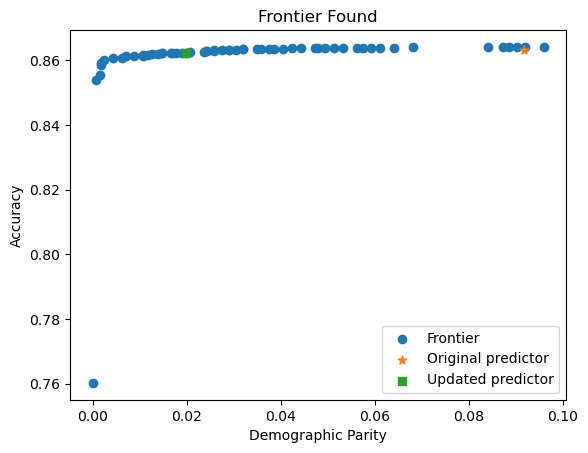

In [9]:
#To debug this, we can look at the Pareto Frontier of solutions considered, on the training set
fpredictor.plot_frontier() 

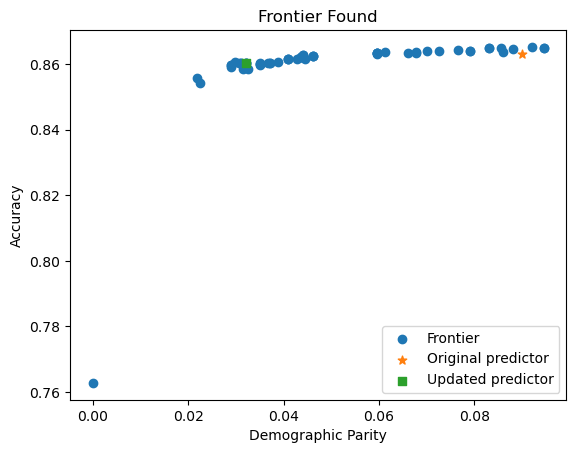

In [10]:
#and on the test set
fpredictor.plot_frontier(test_data) 

In [11]:
#We find that the demographic parity is very different on test data for a range of solutions found.
#By looking at the per group decomposition, we can find out why.
fpredictor.evaluate_groups(test_data, verbose=True)

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                 
original Overall              0.863036           0.771720  0.674453  0.597347   
          Amer-Indian-Eskimo  0.943089           0.722808  0.588235  0.590335   
          Asian-Pac-Islander  0.853659           0.778341  0.671233  0.578916   
          Black               0.930415           0.746597  0.635294  0.625434   
          Other               0.901235           0.728873  0.555556  0.504717   
          White               0.854661           0.771309  0.677308  0.592980   
         Maximum difference   0.089431           0.055533  0.121752  0.120717   
updated  Overall              0.860375           0.773690  0.674152  0.592139   
          Amer-Indian-Eskimo  0.886179           0.814529  0.533333  0.496710   
          Asian-Pac-Islander  0.859756           0.732809  0.622951  0.573605   
          Black               0.901235           0.814753  0.630252  0.577840   
          Other               0.888889           0.850704  0.640000  0.593995   
          White               0.855380           0.773198  0.679926  0.595478   
         Maximum difference   0.045855           0.117895  0.146592  0.098768   

                              Precision    Recall   ROC AUC  Positive Count  \
         Groups                                                               
original Overall               0.773438  0.597929  0.918163          2318.0   
          Amer-Indian-Eskimo   0.833333  0.454545  0.917208            11.0   
          Asian-Pac-Islander   0.710145  0.636364  0.905107            77.0   
          Black                0.857143  0.504673  0.942358           107.0   
          Other                0.625000  0.500000  0.938028            10.0   
          White                0.773390  0.602461  0.914314          2113.0   
         Maximum difference    0.232143  0.181818  0.037251          2103.0   
updated  Overall               0.755353  0.608714  0.904434          2318.0   
          Amer-Indian-Eskimo   0.421053  0.727273  0.917208            11.0   
          Asian-Pac-Islander   0.844444  0.493506  0.905107            77.0   
          Black                0.572519  0.700935  0.942358           107.0   
          Other                0.533333  0.800000  0.938028            10.0   
          White                0.773221  0.606720  0.914314          2113.0   
         Maximum difference    0.423392  0.306494  0.037251          2103.0   

                              Negative Count  Positive Label Rate  \
         Groups                                                     
original Overall                      7451.0             0.237281   
          Amer-Indian-Eskimo           112.0             0.089431   
          Asian-Pac-Islander           251.0             0.234756   
          Black                        784.0             0.120090   
          Other                         71.0             0.123457   
          White                       6233.0             0.253175   
         Maximum difference           6162.0             0.163744   
updated  Overall                      7451.0             0.237281   
          Amer-Indian-Eskimo           112.0             0.089431   
          Asian-Pac-Islander           251.0             0.234756   
          Black                        784.0             0.120090   
          Other                         71.0             0.123457   
          White                       6233.0             0.253175   
         Maximum difference           6162.0             0.163744   

                              Positive Prediction Rate  
         Groups                                         
original Overall                              0.183437  
          Amer-Indian-Eskimo                  0.048780  
          Asian-Pac-Islander                  0.210366  
          Black                               0.070707  
          Other      

In [12]:
#The groups with the smallest Positive Prediction Rate (American-Indian-Eskimo, and Asian-Pacific-Islander) 
# only have around 100-300 samples making it impossible to accurately evaluate demographic parity, while the
# group labelled 'Other' has even less data.
# Moreover, on training data we find that there are less than 350 people identified as American-Indian-Eskimo, 
# meaning that it is not possible to predict if the positive prediction rate will hold on new data. 
fpredictor.evaluate_groups(verbose=True)

Accuracy  Balanced Accuracy  F1 score       MCC  \
         Groups                                                                 
original Overall              0.863282           0.773841  0.678619  0.601415   
          Amer-Indian-Eskimo  0.919308           0.759526  0.631579  0.596937   
          Asian-Pac-Islander  0.835432           0.781507  0.690852  0.580271   
          Black               0.919873           0.747755  0.611253  0.578999   
          Other               0.913846           0.725219  0.575758  0.545464   
          White               0.856775           0.773798  0.682289  0.599909   
         Maximum difference   0.084441           0.056288  0.115094  0.054446   
updated  Overall              0.862386           0.777490  0.681627  0.601039   
          Amer-Indian-Eskimo  0.884726           0.788291  0.591837  0.529272   
          Asian-Pac-Islander  0.832914           0.729868  0.623819  0.554814   
          Black               0.909858           0.851028  0.674905  0.630458   
          Other               0.920000           0.868421  0.711111  0.670927   
          White               0.857254           0.775516  0.684524  0.601745   
         Maximum difference   0.087086           0.138553  0.119274  0.141656   

                              Precision    Recall   ROC AUC  Positive Count  \
         Groups                                                               
original Overall               0.777609  0.601985  0.918321          9369.0   
          Amer-Indian-Eskimo   0.750000  0.545455  0.916067            44.0   
          Asian-Pac-Islander   0.725166  0.659639  0.898432           332.0   
          Black                0.739938  0.520697  0.947958           459.0   
          Other                0.730769  0.475000  0.952895            40.0   
          White                0.782192  0.605015  0.914439          8494.0   
         Maximum difference    0.057026  0.184639  0.054463          8454.0   
updated  Overall               0.765426  0.614367  0.903170          9369.0   
          Amer-Indian-Eskimo   0.537037  0.659091  0.916067            44.0   
          Asian-Pac-Islander   0.837563  0.496988  0.898432           332.0   
          Black                0.598651  0.773420  0.947958           459.0   
          Other                0.640000  0.800000  0.952895            40.0   
          White                0.781014  0.609254  0.914439          8494.0   
         Maximum difference    0.300526  0.303012  0.054463          8454.0   

                              Negative Count  Positive Label Rate  \
         Groups                                                     
original Overall                     29704.0             0.239782   
          Amer-Indian-Eskimo           303.0             0.126801   
          Asian-Pac-Islander           859.0             0.278757   
          Black                       3335.0             0.120980   
          Other                        285.0             0.123077   
          White                      24922.0             0.254190   
         Maximum difference          24637.0             0.157777   
updated  Overall                     29704.0             0.239782   
          Amer-Indian-Eskimo           303.0             0.126801   
          Asian-Pac-Islander           859.0             0.278757   
          Black                       3335.0             0.120980   
          Other                        285.0             0.123077   
          White                      24922.0             0.254190   
         Maximum difference          24637.0             0.157777   

                              Positive Prediction Rate  
         Groups                                         
original Overall                              0.185627  
          Amer-Indian-Eskimo                  0.092219  
          Asian-Pac-Islander                  0.253568  
          Black                               0.085134  
          Other      

## Fairness on COMPAS using Inferred Attributes

We demonstrate how to enforce a wide range of fairness definitions on the COMPAS dataset. This dataset records paroles caught violating the terms of parole. As it measures who was caught, it is strongly influenced by policing and environmental biases, and should not be confused with a measurement of who actually violated their terms of parole. See [this paper](https://datasets-benchmarks-proceedings.neurips.cc/paper/2021/file/92cc227532d17e56e07902b254dfad10-Paper-round1.pdf) for a discussion of its limitations and caveats. 
We use it because it is a standard fairness dataset that captures such strong differences in outcome between people identified as African-American and everyone else, that classifiers trained on this dataset violate most definitions of fairness.

As many of the ethnic groups are too small for reliable statistical estimation, we only consider differences is in outcomes between African-Americans vs. everyone else (labeled as other).
We load and preprocess the COMPAS dataset, splitting it into three roughly equal partitions of train, validation, and test:

In [13]:
import numpy as np
import pandas as pd
from oxonfair import inferred_attribute_builder
all_data = pd.read_csv('https://github.com/propublica/compas-analysis/raw/master/compas-scores-two-years.csv')
condensed_data=all_data[['sex','race','age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'age_cat', 'c_charge_degree','two_year_recid']].copy()
condensed_data.replace({'Caucasian':'Other', 'Hispanic':'Other', 'Native American':'Other', 'Asian':'Other'},inplace=True)
train=condensed_data.sample(frac=0.3, random_state=0)
val_and_test=condensed_data.drop(train.index)
val=val_and_test.sample(frac=0.5, random_state=0)
test=val_and_test.drop(val.index)

In [14]:
# To enforce fairness constraints without access to protected attributes at test time, we train two classifiers to infer the 2-year recidivism rate, and ethnicity.
  
predictor2, protected = inferred_attribute_builder(train, 'two_year_recid', 'race', time_limit=5)


No path specified. Models will be saved in: "AutogluonModels/ag-20240617_142533"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_142533"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       10.59 GB / 16.00 GB (66.2%)
Disk Space Avail:   362.50 GB / 460.43 GB (78.7%)


Train Data Rows:    2164


Train Data Columns: 8


Label Column:       two_year_recid


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  [0, 1]


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 = 1, class 0 = 0


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    10845.11 MB


	Train Data (Original)  Memory Usage: 0.47 MB (0.0% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('object', []) : 3 | ['sex', 'age_cat', 'c_charge_degree']


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 1 | ['age_cat']


		('int', [])       : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('int', ['bool']) : 2 | ['sex', 'c_charge_degree']


	0.0s = Fit runtime


	8 features in original data used to generate 8 features in processed data.


	Train Data (Processed) Memory Usage: 0.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.04s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1731, Val Rows: 433


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.96s of the 4.96s of remaining time.


	0.6351	 = Validation score   (accuracy)


	0.01s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 4.93s of the 4.93s of remaining time.


	0.6259	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 4.89s of the 4.89s of remaining time.


	0.6882	 = Validation score   (accuracy)


	3.27s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: LightGBM ... Training model for up to 1.61s of the 1.6s of remaining time.


	Ran out of time, early stopping on iteration 174. Best iteration is:
	[27]	valid_set's binary_error: 0.323326


	0.6767	 = Validation score   (accuracy)


	1.62s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.96s of the -0.04s of remaining time.


	Ensemble Weights: {'LightGBM': 0.667, 'LightGBMXT': 0.333}


	0.6928	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 5.12s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_142533")


No path specified. Models will be saved in: "AutogluonModels/ag-20240617_142538"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_142538"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       10.37 GB / 16.00 GB (64.8%)
Disk Space Avail:   362.50 GB / 460.43 GB (78.7%)


Train Data Rows:    2164


Train Data Columns: 8


Label Column:       race


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  ['African-American', 'Other']


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 = Other, class 0 = African-American


	Note: For your binary classification, AutoGluon arbitrarily selected which label-value represents positive (Other) vs negative (African-American) class.
	To explicitly set the positive_class, either rename classes to 1 and 0, or specify positive_class in Predictor init.


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    10620.94 MB


	Train Data (Original)  Memory Usage: 0.47 MB (0.0% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('object', []) : 3 | ['sex', 'age_cat', 'c_charge_degree']


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 1 | ['age_cat']


		('int', [])       : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('int', ['bool']) : 2 | ['sex', 'c_charge_degree']


	0.0s = Fit runtime


	8 features in original data used to generate 8 features in processed data.


	Train Data (Processed) Memory Usage: 0.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.03s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1731, Val Rows: 433


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.97s of the 4.97s of remaining time.


	0.6051	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 4.94s of the 4.94s of remaining time.


	0.5889	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 4.92s of the 4.92s of remaining time.


	0.6559	 = Validation score   (accuracy)


	2.88s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: LightGBM ... Training model for up to 2.02s of the 2.02s of remaining time.


	Ran out of time, early stopping on iteration 216. Best iteration is:
	[4]	valid_set's binary_error: 0.364896


	0.6351	 = Validation score   (accuracy)


	2.03s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.97s of the -0.04s of remaining time.


	Ensemble Weights: {'LightGBMXT': 0.8, 'KNeighborsUnif': 0.2}


	0.6582	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 5.09s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_142538")


In [15]:
# From these a single predictor that maximizes acuracy while reducing the demographic parity violation to less than 2.5% can be trained by running:

fpredictor=FairPredictor(predictor2, val, 'race', inferred_groups=protected)
fpredictor.fit(gm.accuracy, gm.demographic_parity, 0.025)

In [16]:
#However, instead we will show how a family of fairness measures can be individually optimized. 
# The following code plots a table showing the change in accuracy and the fairness measure on a held-out test set as we decrease
# the fairness measure to less than 0.025 for all measures except for disparate impact which we raise to above 0.975.
# We define a helper function for evaluation:

def evaluate(fpredictor,use_metrics):
    "Print a table showing the accuracy drop that comes with enforcing fairness"
    extra_metrics= {**use_metrics, 'accuracy':gm.accuracy}
    collect=pd.DataFrame(columns=['Measure (original)', 'Measure (updated)', 'Accuracy (original)', 'Accuracy (updated)'])
    for d in use_metrics.items():
        if d[1].greater_is_better is False:
            fpredictor.fit(gm.accuracy,d[1], 0.025)
        else:
            fpredictor.fit(gm.accuracy,d[1], 1-0.025)
        tmp=fpredictor.evaluate_fairness(test,metrics=extra_metrics)
        collect.loc[d[1].name]=np.concatenate((np.asarray(tmp.loc[d[1].name]), np.asarray(tmp.loc[gm.accuracy.name])), 0)
    return collect

In [17]:
#We can now contrast the behavior of a fair classifier that relies on access to the protected
# attribtute at test time with one that infers it.

# we first create a classifer using the protected attribute
predictor=TabularPredictor(label='two_year_recid').fit(train_data=train, time_limit=5)

No path specified. Models will be saved in: "AutogluonModels/ag-20240617_142543"


No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


Beginning AutoGluon training ... Time limit = 5s


AutoGluon will save models to "AutogluonModels/ag-20240617_142543"


=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.10.13
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:14:38 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T6020
CPU Count:          10
Memory Avail:       10.26 GB / 16.00 GB (64.1%)
Disk Space Avail:   362.50 GB / 460.43 GB (78.7%)


Train Data Rows:    2164


Train Data Columns: 9


Label Column:       two_year_recid


AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).


	2 unique label values:  [0, 1]


	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])


Problem Type:       binary


Preprocessing data ...


Selected class <--> label mapping:  class 1 = 1, class 0 = 0


Using Feature Generators to preprocess the data ...


Fitting AutoMLPipelineFeatureGenerator...


	Available Memory:                    10509.47 MB


	Train Data (Original)  Memory Usage: 0.61 MB (0.0% of available memory)


	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.


	Stage 1 Generators:


		Fitting AsTypeFeatureGenerator...


			Note: Converting 3 features to boolean dtype as they only contain 2 unique values.


	Stage 2 Generators:


		Fitting FillNaFeatureGenerator...


	Stage 3 Generators:


		Fitting IdentityFeatureGenerator...


		Fitting CategoryFeatureGenerator...


			Fitting CategoryMemoryMinimizeFeatureGenerator...


	Stage 4 Generators:


		Fitting DropUniqueFeatureGenerator...


	Stage 5 Generators:


		Fitting DropDuplicatesFeatureGenerator...


	Types of features in original data (raw dtype, special dtypes):


		('int', [])    : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('object', []) : 4 | ['sex', 'race', 'age_cat', 'c_charge_degree']


	Types of features in processed data (raw dtype, special dtypes):


		('category', [])  : 1 | ['age_cat']


		('int', [])       : 5 | ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count']


		('int', ['bool']) : 3 | ['sex', 'race', 'c_charge_degree']


	0.0s = Fit runtime


	9 features in original data used to generate 9 features in processed data.


	Train Data (Processed) Memory Usage: 0.09 MB (0.0% of available memory)


Data preprocessing and feature engineering runtime = 0.04s ...


AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'


	To change this, specify the eval_metric parameter of Predictor()


Automatically generating train/validation split with holdout_frac=0.2, Train Rows: 1731, Val Rows: 433


User-specified model hyperparameters to be fit:
{
	'NN_TORCH': {},
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge'],
	'CAT': {},
	'XGB': {},
	'FASTAI': {},
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}


Fitting 13 L1 models ...


Fitting model: KNeighborsUnif ... Training model for up to 4.96s of the 4.96s of remaining time.


	0.6351	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: KNeighborsDist ... Training model for up to 4.93s of the 4.93s of remaining time.


	0.6259	 = Validation score   (accuracy)


	0.0s	 = Training   runtime


	0.02s	 = Validation runtime


Fitting model: LightGBMXT ... Training model for up to 4.91s of the 4.91s of remaining time.


	0.6975	 = Validation score   (accuracy)


	3.06s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: LightGBM ... Training model for up to 1.84s of the 1.84s of remaining time.


	Ran out of time, early stopping on iteration 209. Best iteration is:
	[42]	valid_set's binary_error: 0.325635


	0.6744	 = Validation score   (accuracy)


	1.85s	 = Training   runtime


	0.0s	 = Validation runtime


Fitting model: WeightedEnsemble_L2 ... Training model for up to 4.96s of the -0.04s of remaining time.


	Ensemble Weights: {'LightGBMXT': 1.0}


	0.6975	 = Validation score   (accuracy)


	0.02s	 = Training   runtime


	0.0s	 = Validation runtime


AutoGluon training complete, total runtime = 5.09s ... Best model: "WeightedEnsemble_L2"


TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240617_142543")


In [18]:
#Create a fair predictor object, using the attribute 'race' on validation data
fpredictor = FairPredictor(predictor, val, 'race')
#and then evaluate it
evaluate(fpredictor, gm.clarify_metrics)
#Note that Class Imbalance is a property of the dataset and can not be altered.

,Measure (original),Measure (updated),Accuracy (original),Accuracy (updated)
Demographic Parity,0.336580,0.010250,0.661386,0.646337
Disparate Impact,0.424223,0.985274,0.661386,0.638812
Average Group Difference in Conditional Acceptance Rate,0.644987,0.055467,0.661386,0.670891
Average Group Difference in Conditional Rejectance Rate,0.354906,0.003563,0.661386,0.666535
Average Group Difference in Accuracy,0.048422,0.036576,0.661386,0.662574
Average Group Difference in Recall,0.306877,0.065208,0.661386,0.640396
Average Group Difference in Acceptance Rate,0.000623,0.017213,0.661386,0.666139
Average Group Difference in Specificity,0.296718,0.054075,0.661386,0.671287
Average Group Difference in Rejection Rate,0.049978,0.072272,0.661386,0.667723
Treatment Equality,1.117626,0.047186,0.661386,0.672079


In [19]:
 # Now using infered attributes
fpredictor2 = FairPredictor(predictor2, val, 'race', inferred_groups=protected)
evaluate(fpredictor2, gm.clarify_metrics)

,Measure (original),Measure (updated),Accuracy (original),Accuracy (updated)
Demographic Parity,0.234362,0.035235,0.671287,0.554851
Disparate Impact,0.561681,0.988790,0.671287,0.542970
Average Group Difference in Conditional Acceptance Rate,0.300350,0.008952,0.671287,0.622574
Average Group Difference in Conditional Rejectance Rate,0.165646,0.017900,0.671287,0.653861
Average Group Difference in Accuracy,0.043198,0.042238,0.671287,0.666139
Average Group Difference in Recall,0.190611,0.018044,0.671287,0.557624
Average Group Difference in Acceptance Rate,0.033289,0.207826,0.671287,0.588515
Average Group Difference in Specificity,0.197344,0.076504,0.671287,0.651485
Average Group Difference in Rejection Rate,0.074006,0.077252,0.671287,0.666535
Treatment Equality,0.561487,0.069292,0.671287,0.659010
